rmckanry_ml.ipynb
Rex McKanry
https://github.com/rmckanry/datafun-07-ml


In [59]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np


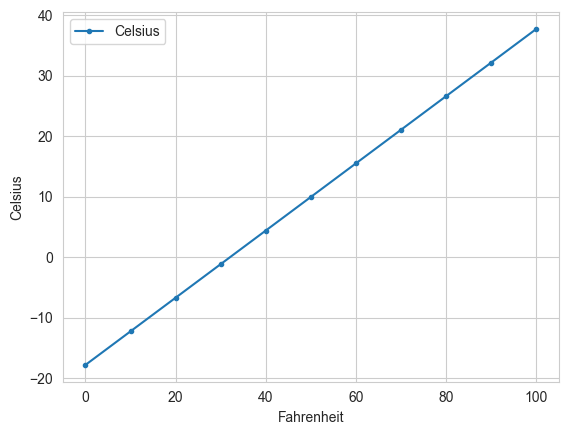

In [60]:
### Part 1 - Chart a Straight Line

c = lambda f: 5/9 * (f - 32)
temps = [(f, c(f)) for f in range(0, 101, 10)]

temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')


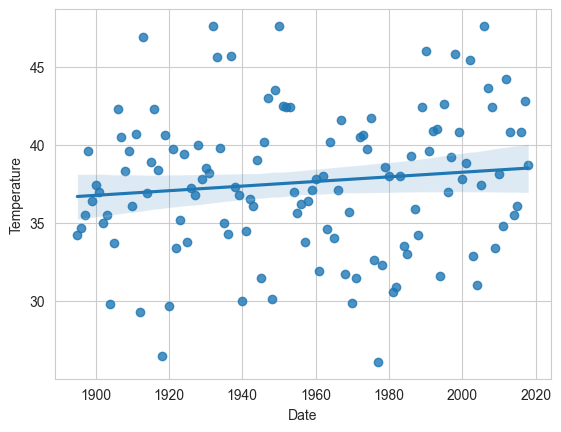

In [61]:
### Part 2 - Prediction

nyc_df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')
nyc_df.head()
nyc_df.tail()

nyc_df.columns = ['Date' ,'Temperature', 'Anomaly']
nyc_df.head(3)

nyc_df.Date.dtype
#dtype('int64')

nyc_df.Date = nyc_df.Date.floordiv(100)
nyc_df.head(3)

pd.set_option('display.precision', 2)
nyc_df.Temperature.describe()

linear_regression = stats.linregress(x=nyc_df.Date, y=nyc_df.Temperature)
linear_regression.slope
linear_regression.intercept

linear_regression.slope * 2019 + linear_regression.intercept
linear_regression.slope * 1890 + linear_regression.intercept
linear_regression.slope * 2024 + linear_regression.intercept

sns.set_style('whitegrid')
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)


predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


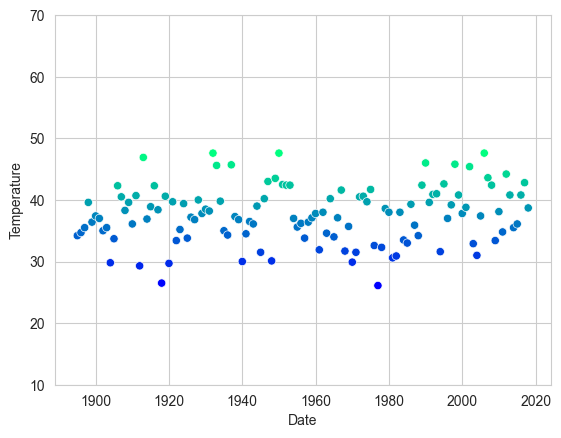

In [62]:
### Part 3 - Prediction

X_train, X_test, y_train, y_test = train_test_split(nyc_df.Date.values.reshape(-1, 1), nyc_df.Temperature.values, random_state=11)
X_train.shape
X_test.shape

linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

linear_regression.coef_
linear_regression.intercept_

predicted = linear_regression.predict(X_test)
expected = y_test
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')
    
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)
predict(2019)
predict(1890)
predict(2024)

axes = sns.scatterplot(data=nyc_df, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)
axes.set_ylim(10, 70)
x = np.array([min(nyc_df.Date.values), max(nyc_df.Date.values)])



### Part 4: Insights
```
The data shows a slight increase in temperature over 1890's to 2024.
These are valuable tools that assist the development of code for analyses of data and the creation of charts.
I definitely need more time to learn all of the functions and tools available.
```